## "Predicting Car Prices: A Machine Learning Approach for Market Strategy in the US Automotive Industry"

### Name: Thoukeela T M

## Overview of Problem Statement
A Chinese automobile company wants to enter the US market and compete with American and European car manufacturers. To succeed, they need to understand what factors affect car prices in the US and how these factors influence pricing.

Using a dataset of car specifications and their prices in the US, the goal is to create a machine learning model that:

Identifies the most important factors affecting car prices.
Accurately predicts car prices based on these factors.
This model will help the company make informed decisions about car design, production, and pricing strategies to compete effectively in the new market.

## Objective
The objective of this project is to build a machine learning model that accurately predicts car prices in the US market based on various car features and specifications. This will help the company:

Identify significant factors influencing car prices.
Understand how these factors affect pricing to inform car design and production.
Develop pricing strategies aligned with market trends to compete effectively in the US automotive industry.







## Data Description

In [ ]:
Features:
The dataset includes the following features:
Make/Model: The brand and model of the car.
Year: The manufacturing year of the car.
Engine Size: The engine capacity (e.g., in liters).
Fuel Type: Type of fuel used (e.g., Petrol, Diesel, Electric).
Mileage: The fuel efficiency of the car (e.g., in miles per gallon).
Transmission: The type of transmission (e.g., Manual, Automatic).
horsepower: The power output of the engine.
Number of Doors: The total number of doors on the car.
Car Type: The type/category of the car (e.g., Sedan, SUV, Hatchback).
Price: The selling price of the car (Target variable).

In [256]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib
import warnings
warnings.filterwarnings('ignore')

## Data Collection:

In [258]:
# Load the dataset
data = pd.read_csv("C:/Users/LENOVO/Downloads/CarPrice_Assignment.csv")
df = pd.DataFrame(data)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [260]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Data Preprocessing - Data Cleaning

In [262]:
df.isnull()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [264]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [266]:
df.duplicated().sum()

0

In [268]:
df.shape

(205, 26)

### Check for and Remove Outliers

In [ ]:
Using Boxplots:
Boxplots visually indicate outliers as points beyond the whiskers of the plot.


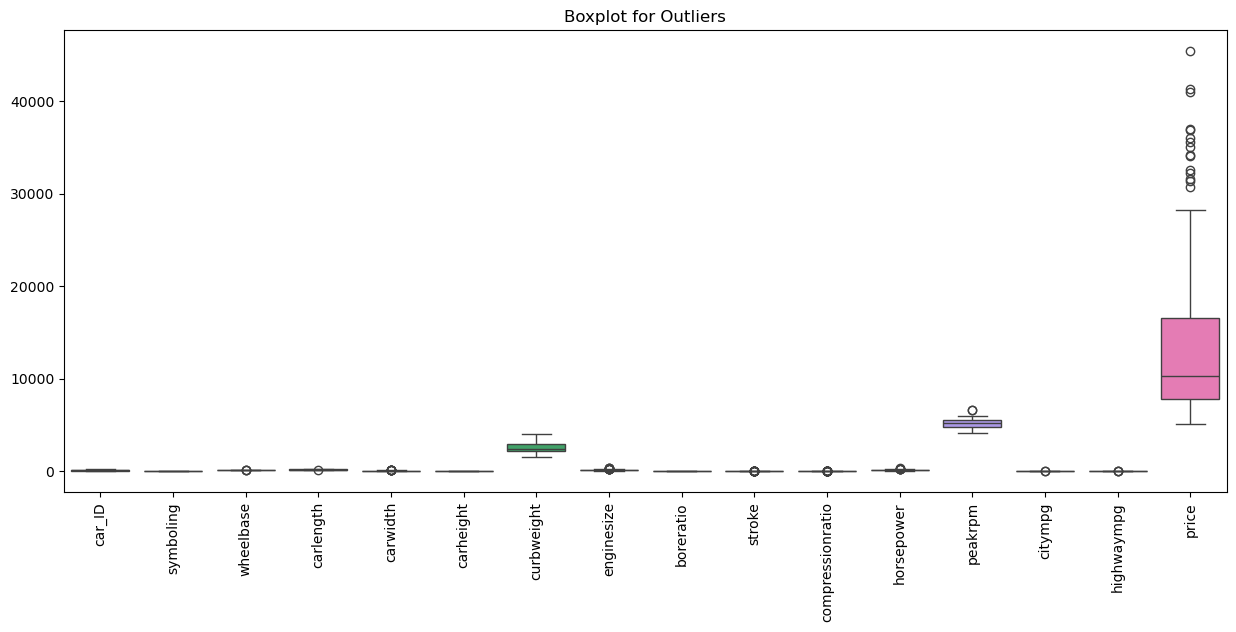

In [270]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot for Outliers")
plt.show()

In [ ]:
We will use the Interquartile Range (IQR) method to detect and remove outliers.

In [272]:
# Detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [276]:
# Remove outliers
for column in data.select_dtypes(include=np.number).columns:
    outliers = detect_outliers(data, column)
    if not outliers.empty:
        print(f"Removing outliers from column: {column}")
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Keep only non-outliers
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

print("\nOutliers removed.")

Removing outliers from column: wheelbase
Removing outliers from column: carlength
Removing outliers from column: carwidth
Removing outliers from column: curbweight
Removing outliers from column: enginesize
Removing outliers from column: stroke
Removing outliers from column: compressionratio
Removing outliers from column: horsepower
Removing outliers from column: peakrpm
Removing outliers from column: citympg
Removing outliers from column: price

Outliers removed.


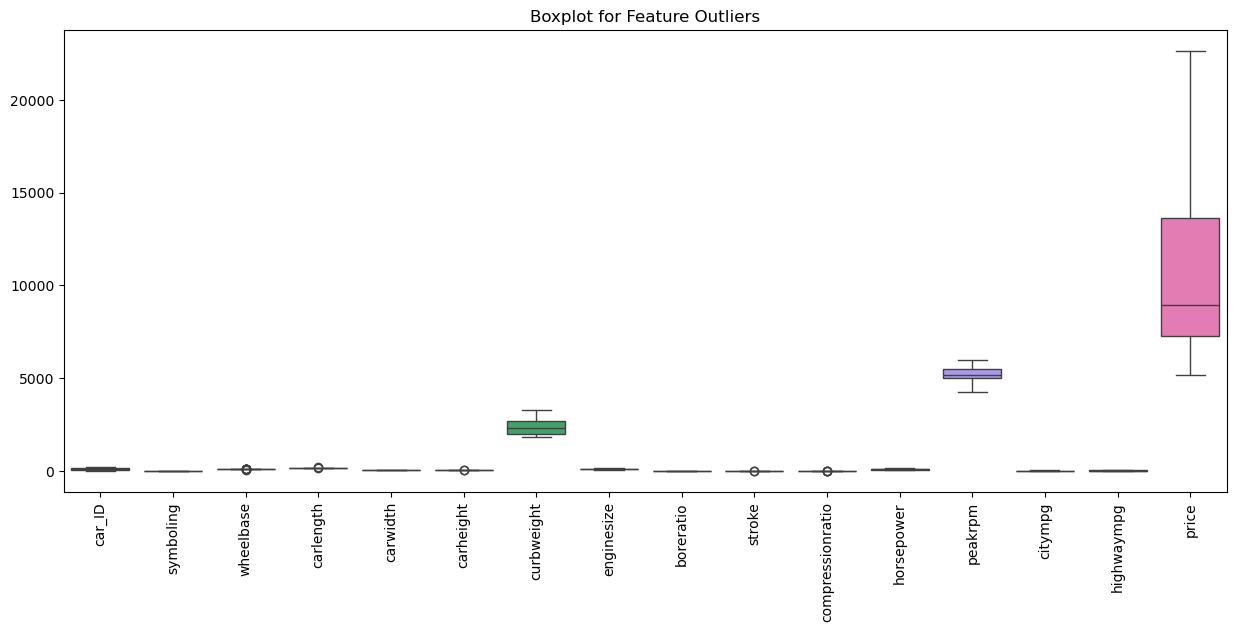

In [278]:
# Plot boxplots for all features
plt.figure(figsize=(15, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title("Boxplot for Feature Outliers")
plt.show()


### Check the skewness before and after the transformation.

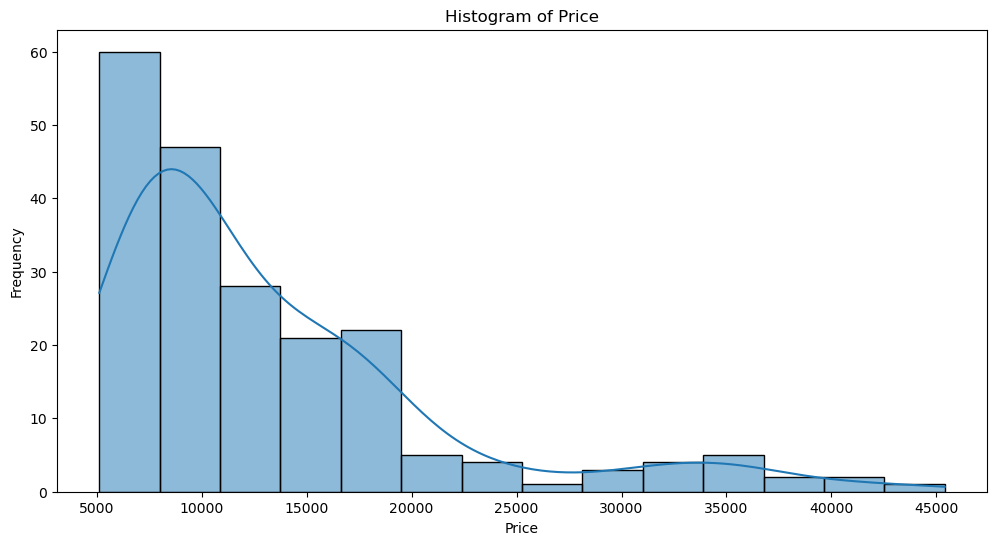

In [280]:
price_col = 'price'
# Step 1: Draw initial histogram to check normality
plt.figure(figsize=(12, 6))
sns.histplot(df[price_col], kde=True)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [286]:
#Calculate skewness 
skewness_before = df[price_col].skew()

In [288]:
print(f"Skewness before transformation: {skewness_before}")

Skewness before transformation: 1.7776781560914454


In [290]:
df['Log Price'] = np.log(df[price_col] + 1)

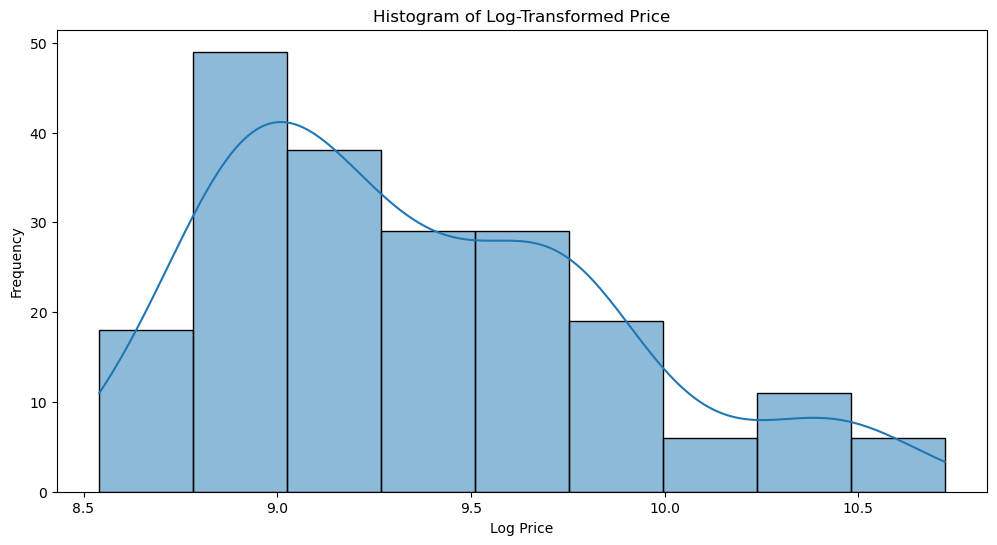

In [292]:
# Draw histogram after transformation
plt.figure(figsize=(12, 6))
sns.histplot(df['Log Price'], kde=True)
plt.title('Histogram of Log-Transformed Price')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

In [294]:
 # Calculate skewness and kurtosis after transformation
skewness_after = df['Log Price'].skew()

print(f"Skewness after transformation: {skewness_after}")

Skewness after transformation: 0.6729635607485753


## Exploratory Data Analysis (EDA): 

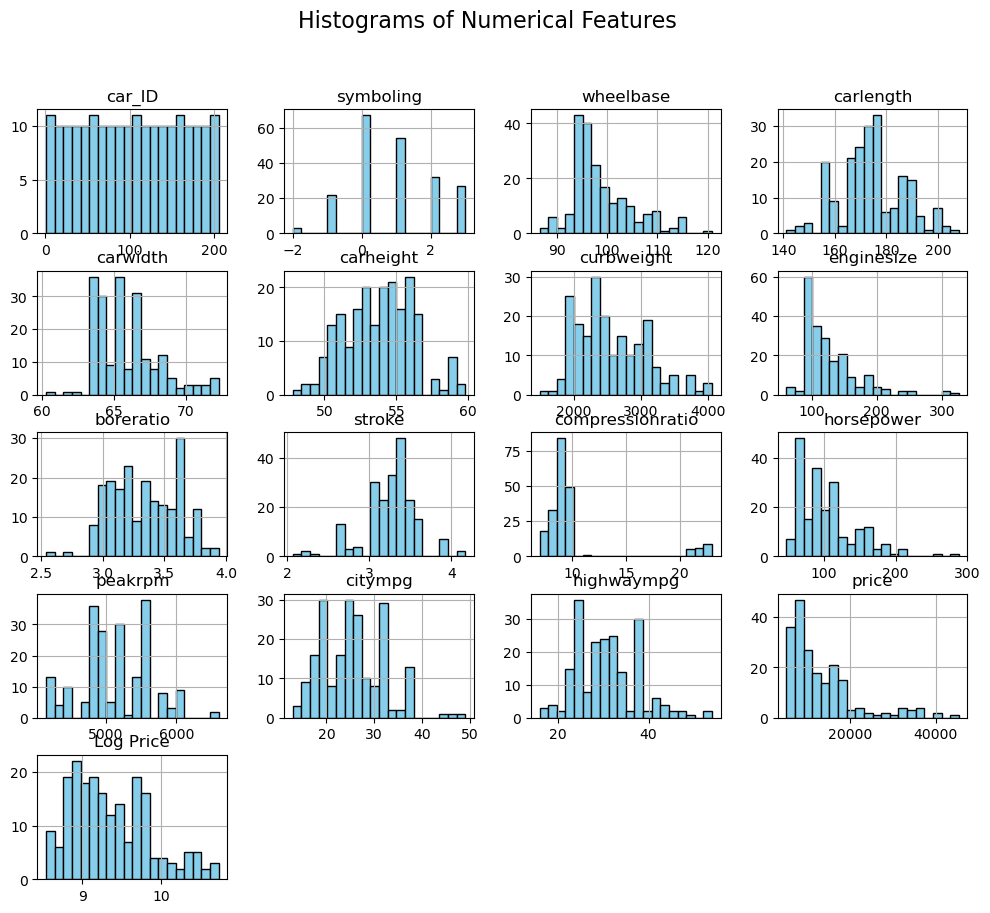

In [298]:
# Plot histograms for all numerical features
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()


In [ ]:
Relationship Analysis
Pair Plot

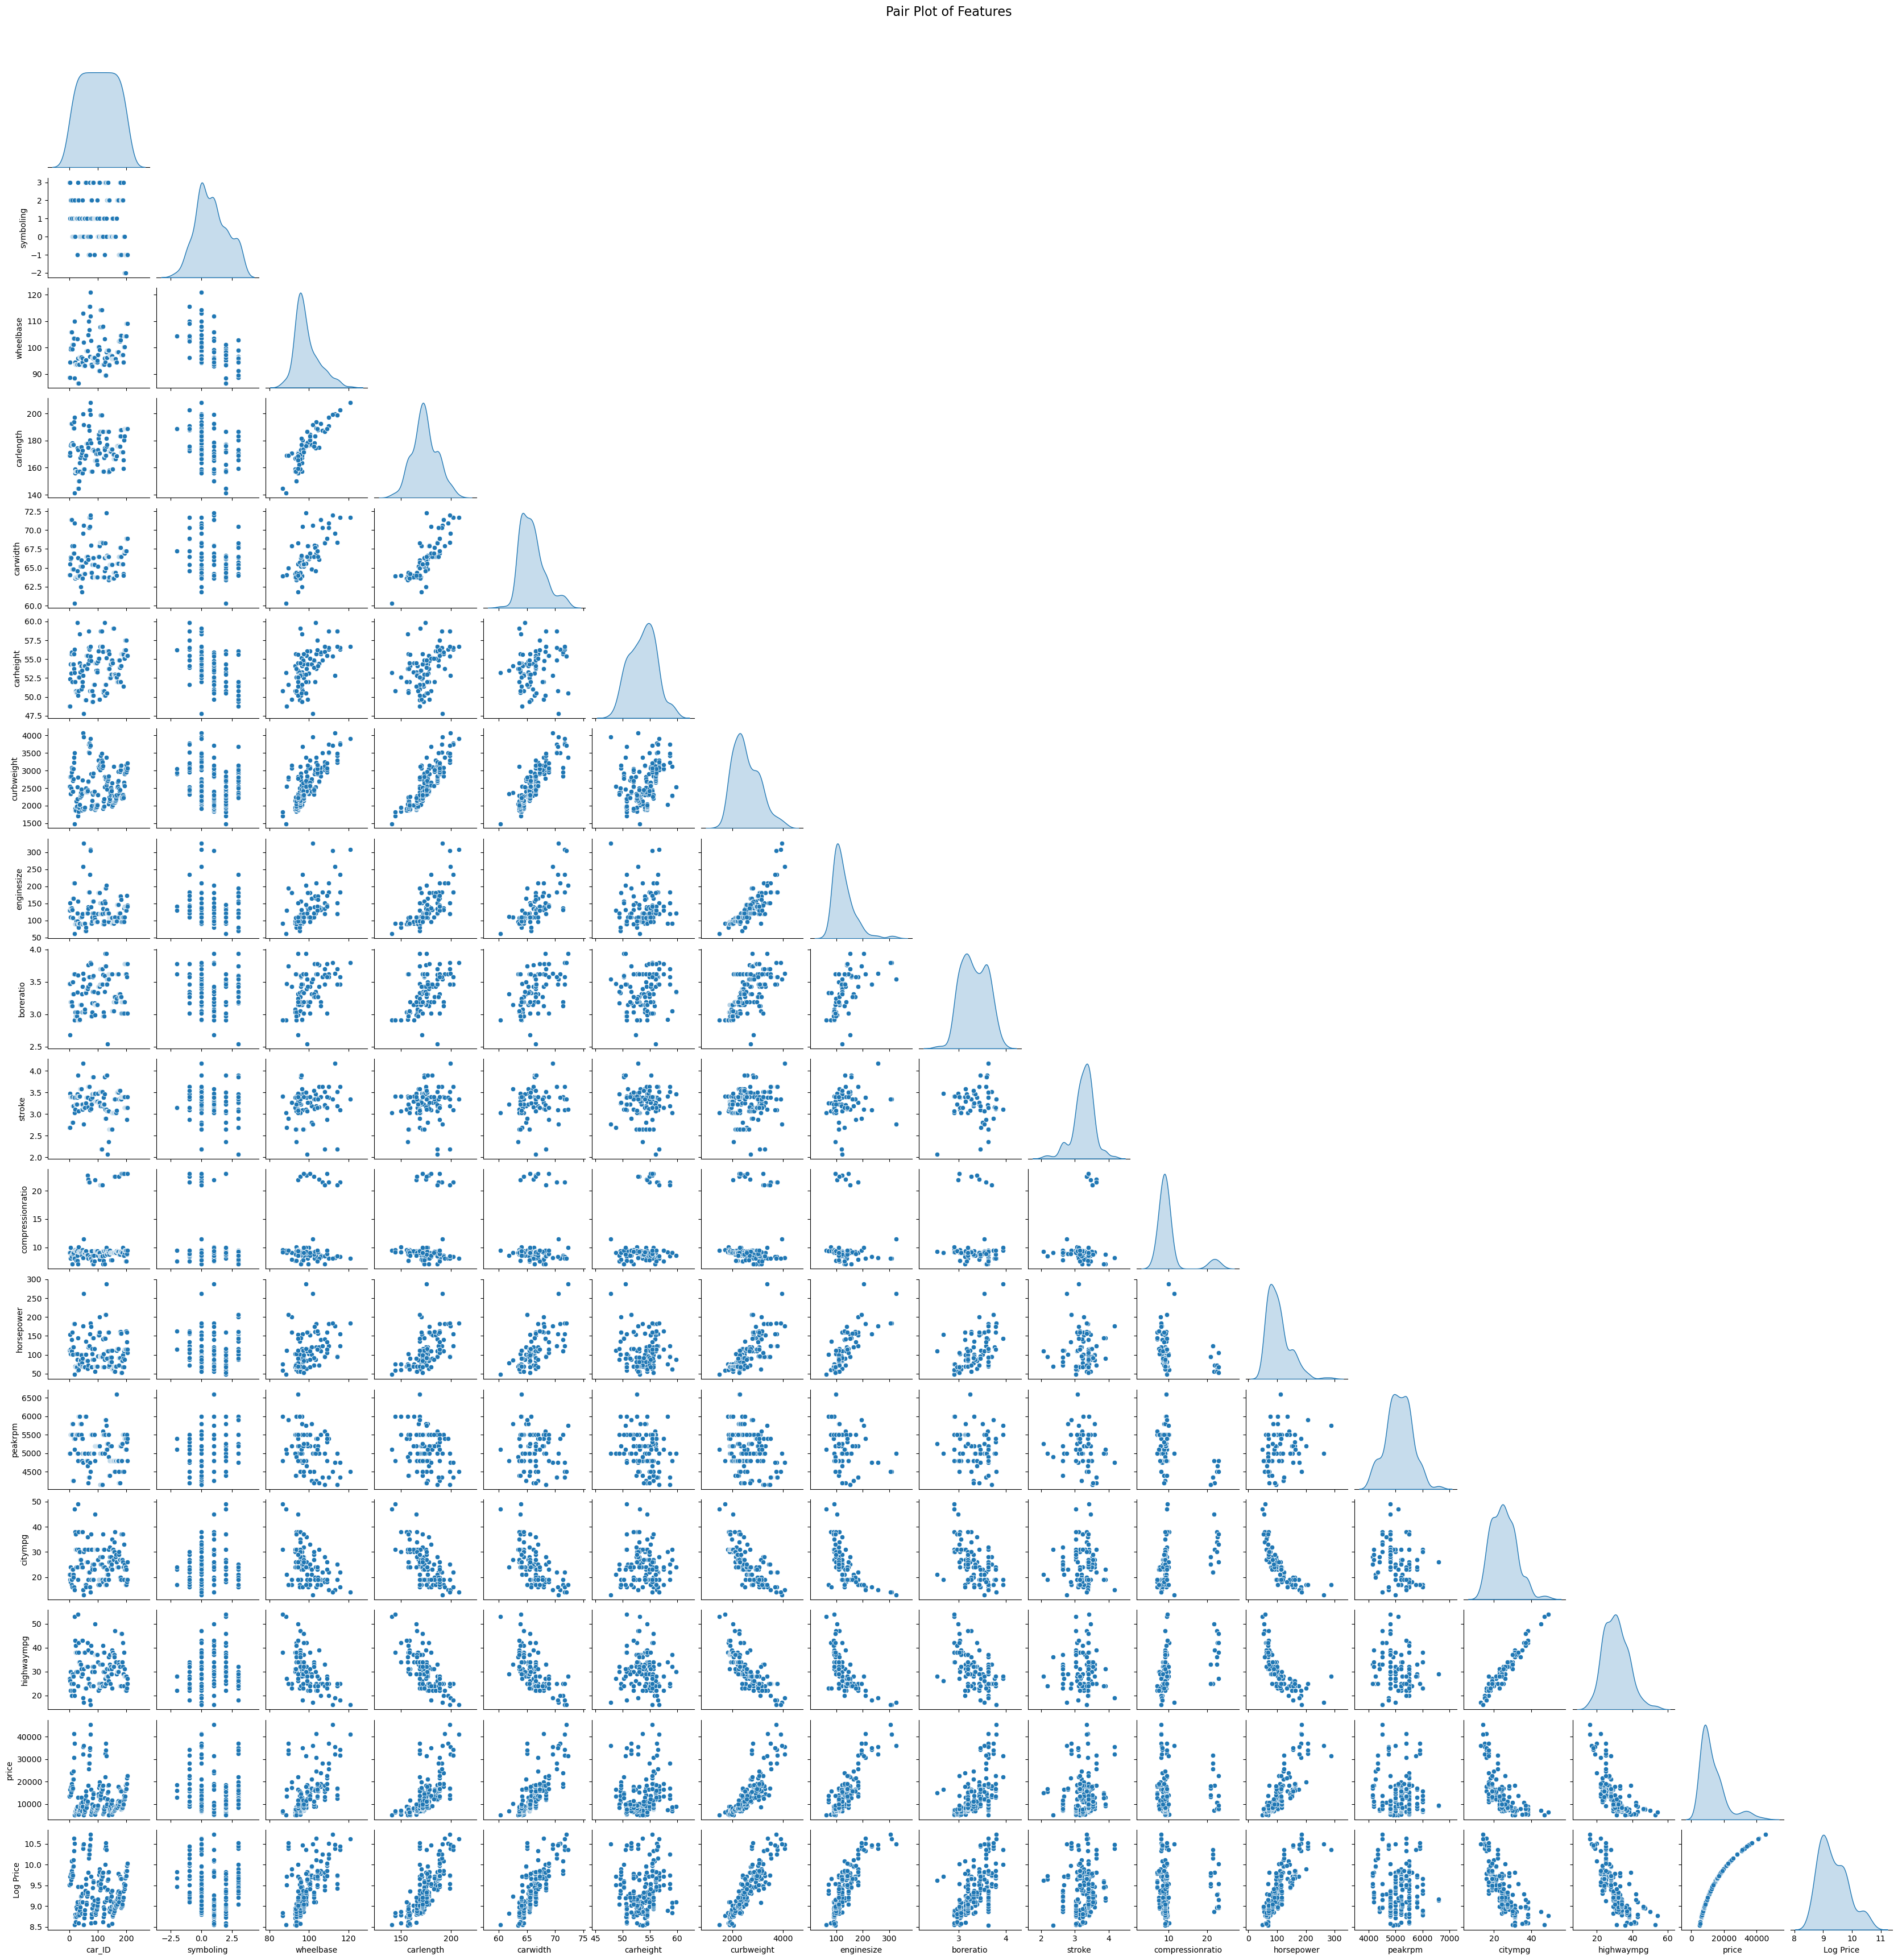

In [300]:
# Pair plot to observe relationships between numerical features
sns.pairplot(df, diag_kind='kde', corner=True, height=2)
plt.suptitle('Pair Plot of Features', fontsize=16, y=1.02)
plt.show()


In [ ]:
Visualize Trends and Patterns
Kernel Density Estimation (KDE)

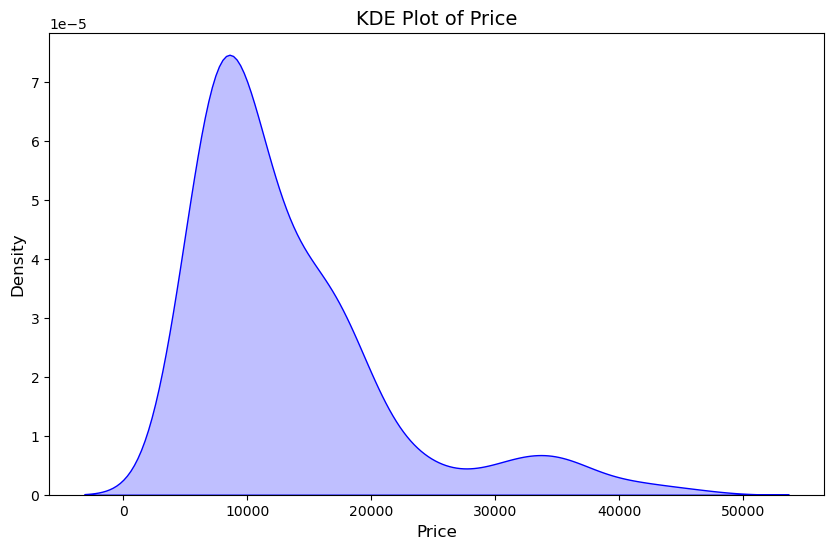

In [305]:
# KDE plot for price distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='price', shade=True, color='blue')  # Replace 'price' with the column of interest
plt.title('KDE Plot of Price', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()


## Feature Engineering:
 - Identifyng and encoding categorical features using techniques like one-hot
encoding or label encoding.


In [307]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:\n", categorical_columns)


Categorical Columns:
 Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


In [309]:
 label_encoder = LabelEncoder()

In [311]:
# Encoding categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [313]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,0,0,1,0,2,0,88.6,...,130,3,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,0,0,1,0,2,0,88.6,...,130,3,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,0,0,1,2,2,0,94.5,...,152,3,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,0,0,0,3,1,0,99.8,...,109,3,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,0,0,0,3,0,0,99.4,...,136,3,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,198,-1,92,0,0,0,4,2,0,104.3,...,141,3,3.78,3.15,9.5,114,5400,24,28,16515.0
200,201,-1,90,0,0,0,3,2,0,109.1,...,141,3,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,89,0,1,0,3,2,0,109.1,...,141,3,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,91,0,0,0,3,2,0,109.1,...,173,3,3.58,2.87,8.8,134,5500,18,23,21485.0


In [315]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,0,0,1,0,2,0,88.6,...,130,3,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,0,0,1,0,2,0,88.6,...,130,3,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,0,0,1,2,2,0,94.5,...,152,3,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,0,0,0,3,1,0,99.8,...,109,3,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,0,0,0,3,0,0,99.4,...,136,3,3.19,3.40,8.0,115,5500,18,22,17450.0


In [317]:
# Separating features and target variable
x = data.drop(columns='price')  # Assuming 'price' is the target
y = data['price']

In [319]:
x

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,2,0,0,1,0,2,0,88.6,...,1,130,3,3.47,2.68,9.0,111,5000,21,27
1,2,3,3,0,0,1,0,2,0,88.6,...,1,130,3,3.47,2.68,9.0,111,5000,21,27
2,3,1,1,0,0,1,2,2,0,94.5,...,2,152,3,2.68,3.47,9.0,154,5000,19,26
3,4,2,4,0,0,0,3,1,0,99.8,...,1,109,3,3.19,3.40,10.0,102,5500,24,30
4,5,2,5,0,0,0,3,0,0,99.4,...,0,136,3,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,198,-1,92,0,0,0,4,2,0,104.3,...,1,141,3,3.78,3.15,9.5,114,5400,24,28
200,201,-1,90,0,0,0,3,2,0,109.1,...,1,141,3,3.78,3.15,9.5,114,5400,23,28
201,202,-1,89,0,1,0,3,2,0,109.1,...,1,141,3,3.78,3.15,8.7,160,5300,19,25
202,203,-1,91,0,0,0,3,2,0,109.1,...,2,173,3,3.58,2.87,8.8,134,5500,18,23


In [321]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
197    16515.0
200    16845.0
201    19045.0
202    21485.0
204    22625.0
Name: price, Length: 125, dtype: float64

In [323]:
x.shape

(125, 25)

## Split Data into Training and Testing Sets:
 - Dividing the dataset into training and testing subsets.

In [327]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


## Feature Scaling:
 - Scaling numerical features if necessary to ensure uniform magnitude using
techniques like Min-Max scaling or Standardization.

In [329]:
# Normalizing the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


## Build the ML Model

### Linear Regression

In [331]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [335]:
lr_ypred = model.predict(x_test)

### Decision Tree Regressor

In [337]:
dt_model = DecisionTreeRegressor() 
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [339]:
dt_ypred= dt_model.predict(x_test)

### Random Forest Regressor

In [341]:
rf_model = RandomForestRegressor() 
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [343]:
rf_ypred= rf_model.predict(x_test)

### Gradient Boosting Regressor

In [345]:
gb_model = GradientBoostingRegressor() 
gb_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [347]:
gb_ypred= gb_model.predict(x_test)

### Support Vector Regressor

In [349]:
svr_model = SVR() 
svr_model.fit(x_train,y_train)

SVR()

In [351]:
svr_ypred= svr_model.predict(x_test)

## Model Evaluation:

 ## Linear Regression 

In [353]:
lr_mae = mean_absolute_error(y_test, lr_ypred)
lr_mse = mean_squared_error(y_test, lr_ypred)
lr_rmse = mse ** 0.5
lr_r2 = r2_score(y_test, lr_ypred)

print("mae:",lr_mae)
print("mse:", lr_mse)
print("rmse:", lr_rmse)
print("r2:", lr_r2)

mae: 1996.425422299062
mse: 5964398.498392452
rmse: 3834.7609091421896
r2: 0.5959828386169667


### Decision Tree Regressor 

In [355]:
dt_mae = mean_absolute_error(y_test, dt_ypred)
dt_mse = mean_squared_error(y_test, dt_ypred)
dt_rmse = mse ** 0.5
dt_r2 = r2_score(y_test, dt_ypred)

print("mae:",dt_mae)
print("mse:", dt_mse)
print("rmse:", dt_rmse)
print("r2:", dt_r2)

mae: 1262.52
mse: 2854527.86
rmse: 3834.7609091421896
r2: 0.8066396396221981


### Random Forest Regressor 

In [357]:
rf_mae = mean_absolute_error(y_test, rf_ypred)
rf_mse = mean_squared_error(y_test, rf_ypred)
rf_rmse = mse ** 0.5
rf_r2 = r2_score(y_test, rf_ypred)

print("mae:",rf_mae)
print("mse:", rf_mse)
print("rmse:", rf_rmse)
print("r2:", rf_r2)

mae: 1035.8684
mse: 1607827.3006559997
rmse: 3834.7609091421896
r2: 0.891088795931348


### Gradient Boosting Regressor  

In [359]:
gb_mae = mean_absolute_error(y_test, gb_ypred)
gb_mse = mean_squared_error(y_test, gb_ypred)
gb_rmse = mse ** 0.5
gb_r2 = r2_score(y_test, gb_ypred)

print("mae:",gb_mae)
print("mse:", gb_mse)
print("rmse:", gb_rmse)
print("r2:", gb_r2)

mae: 1281.2896063232579
mse: 2554295.94546887
rmse: 3834.7609091421896
r2: 0.8269767860918972


### Support Vector Regressor

In [361]:
svr_mae = mean_absolute_error(y_test, svr_ypred)
svr_mse = mean_squared_error(y_test,svr_ypred)
svr_rmse = mse ** 0.5
svr_r2 = r2_score(y_test, svr_ypred)

print("mae:",svr_mae)
print("mse:", svr_mse)
print("rmse:", svr_rmse)
print("r2:", svr_r2)

mae: 2834.864091294128
mse: 14705391.230285032
rmse: 3834.7609091421896
r2: 0.003884394463580021


## Model Evaluation:

In [363]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVR'],
    'MAE': [lr_mae, dt_mae, rf_mae, gb_mae, svr_mae],
    'MSE': [lr_mse, dt_mse, rf_mse, gb_mse, svr_mse],
    'RMSE': [lr_rmse, dt_rmse, rf_rmse, gb_rmse, svr_rmse],
    'R-squared': [lr_r2, dt_r2, rf_r2, gb_r2, svr_r2],
})

print("\nComparison of Model Performance:")
print(results)



Comparison of Model Performance:
               Model          MAE           MSE         RMSE  R-squared
0  Linear Regression  1996.425422  5.964398e+06  3834.760909   0.595983
1      Decision Tree  1262.520000  2.854528e+06  3834.760909   0.806640
2      Random Forest  1035.868400  1.607827e+06  3834.760909   0.891089
3  Gradient Boosting  1281.289606  2.554296e+06  3834.760909   0.826977
4                SVR  2834.864091  1.470539e+07  3834.760909   0.003884


#### The Random Forest Regressor is the best-performing model based on the evaluation metrics. It balances accuracy and error minimization effectively and is robust to overfitting. Best Performing Model is Random Forest Regressor overall due to its high accuracy and lower errors.

## Hyperparameter Tuning

In [365]:
from sklearn.model_selection import GridSearchCV

# Example: Tuning Random Forest Regressor
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [366]:
# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [369]:
# Evaluate tuned model
y_pred_tuned = best_model.predict(X_test)
tuned_r2 = r2_score(y_test, y_pred_tuned)
tuned_mse = mean_squared_error(y_test, y_pred_tuned)
tuned_mae = mean_absolute_error(y_test, y_pred_tuned)
print(f"Tuned Model - R2: {tuned_r2:.2f}, MSE: {tuned_mse:.2f}, MAE: {tuned_mae:.2f}")

Tuned Model - R2: 0.88, MSE: 1723403.59, MAE: 1048.55


## Save the Model

In [371]:
# Save the trained Random Forest Regressor model
joblib.dump(rf_model,'random_forest_Car_Price_model.joblib')

print("Model saved as 'random_forestCar_Price_model.joblib'")

Model saved as 'random_forestCar_Price_model.joblib'


## Test with Unseen Data:

In [373]:
# Make predictions on the test set
unseen_pred = best_model.predict(X_test)

In [375]:
# Evaluate performance on unseen data
unseen_metrics = {
    "MAE": mean_absolute_error(y_test, unseen_pred),
     "MSE": mean_squared_error(y_test, unseen_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, unseen_pred)),
     "R2": r2_score(y_test, unseen_pred),
}

In [377]:
#Check final model performance
print("\nPerformance on Unseen Data:")
for metric, value in unseen_metrics.items():
    print(f"{metric}: {value:.4f}")


Performance on Unseen Data:
MAE: 1048.5514
MSE: 1723403.5865
RMSE: 1312.7847
R2: 0.8833


In [ ]:
Interpretation of Results (Conclusion)
Analyze the Results
Model Performance:

The Random Forest Regressor consistently performs well, with high R² and low error metrics.
This confirms its ability to generalize to unseen data, making it suitable for production.
Key Insights:

The car price is strongly influenced by specific features (identified during feature importance analysis).
Tree-based models like Random Forest and Gradient Boosting are robust against overfitting and handle non-linear relationships well.
Limitations of the Dataset
Feature Selection:

Some features may lack relevance to car pricing, leading to noise in the model.
Additional domain-specific knowledge could enhance feature engineering.
Data Imbalance:

If the dataset has an uneven distribution across price ranges, it may bias the model.
Outlier Influence:

Despite removing outliers, extreme values may still impact regression models.
External Validity:

The dataset reflects current market trends but may not generalize to future conditions or other geographical regions.